In [176]:

import matplotlib.pyplot as plt
import nest

In [177]:

nest.ResetKernel()

neuron = nest.Create("iaf_psc_alpha")
neuron.get()
neuron.get(["V_reset", "V_th"])
neuron.set(I_e=376)

In [178]:
neuron2 = nest.Create("iaf_psc_alpha")
neuron2.set({"I_e": 300.0})

In [179]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

spikerecorder = nest.Create("spike_recorder")

In [180]:
nest.Connect(multimeter, neuron)
nest.Connect(multimeter, neuron2)
nest.Connect(neuron, spikerecorder)

In [181]:
nest.Simulate(1000.0)


Aug 13 11:00:32 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Aug 13 11:00:32 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Aug 13 11:00:32 SimulationManager::run [Info]: 
    Simulation finished.


In [182]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

events = spikerecorder.get("events")
senders = events["senders"]
spike_ts = events["times"]

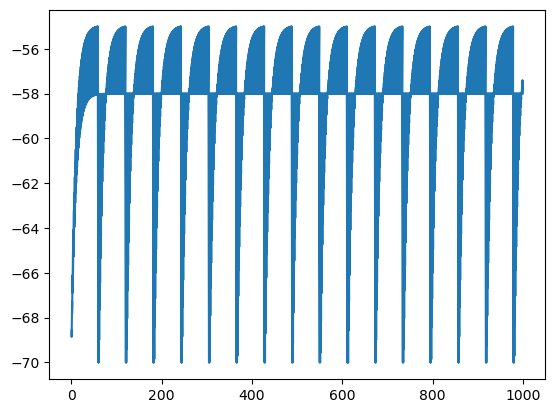

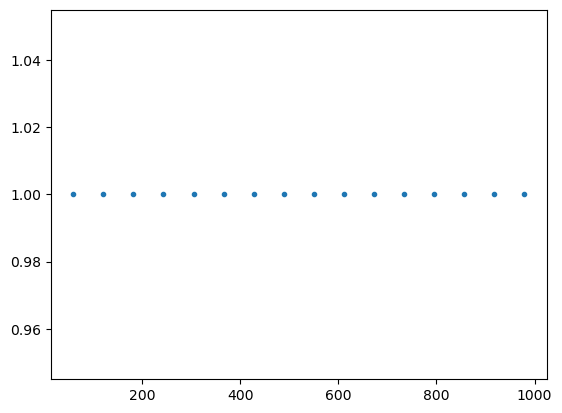

In [183]:
plt.figure(1)
plt.plot(ts, Vms)

plt.figure(2)
plt.plot(spike_ts, senders, ".")
plt.show()

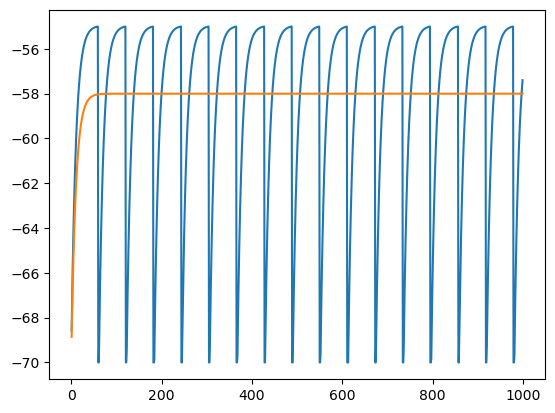

In [184]:
plt.figure(3)
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
plt.plot(ts1, Vms1)
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]
plt.plot(ts2, Vms2)
